In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load the dataset
url = 'Automobile_insurance_fraud.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Automobile_insurance_fraud.csv")

# Check the dimensions of the dataset
print("Dataset Dimensions:", data.shape)

# Print column names and data types
print("\nColumn Names and Data Types:")
print(data.dtypes)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Explore the target variable
print("\nDistribution of the Target Variable:")
print(data['fraud_reported'].value_counts())


In [ ]:

# Analyze numerical variables
numerical_cols = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                  'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
                  'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

print("\nSummary Statistics for Numerical Variables:")
print(data[numerical_cols].describe())


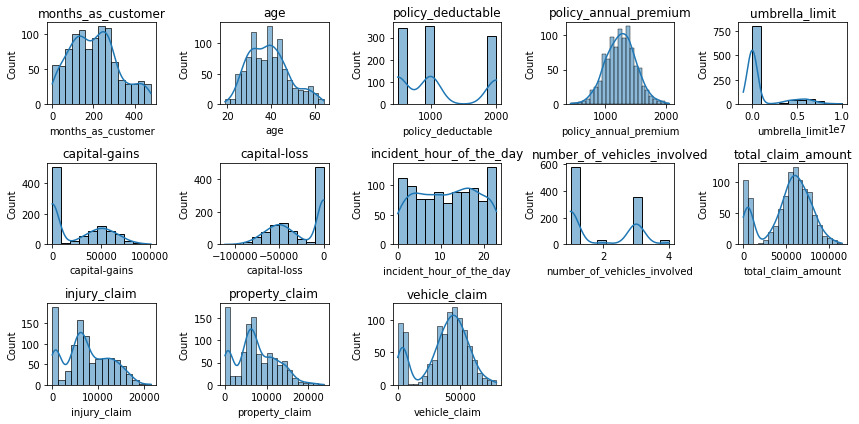

In [33]:

# Visualize the distributions of numerical variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()



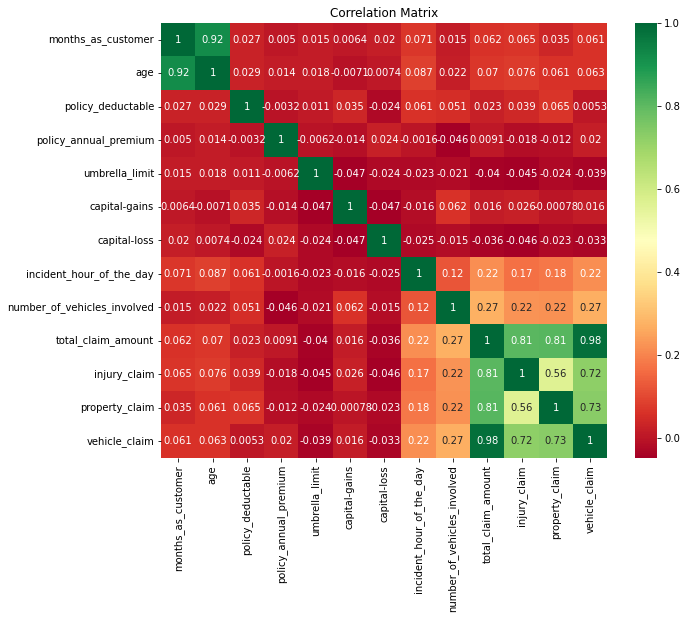

In [34]:
# Examine the correlations between numerical variables
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix")
plt.show()



In [35]:
# Analyze categorical variables
categorical_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                    'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type',
                    'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
                    'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']

print("\nValue Counts for Categorical Variables:")
for col in categorical_cols:
    print("\n", col)
    print(data[col].value_counts())




Value Counts for Categorical Variables:

 policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

 policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

 insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

 insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

 insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

 insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies        

C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritu

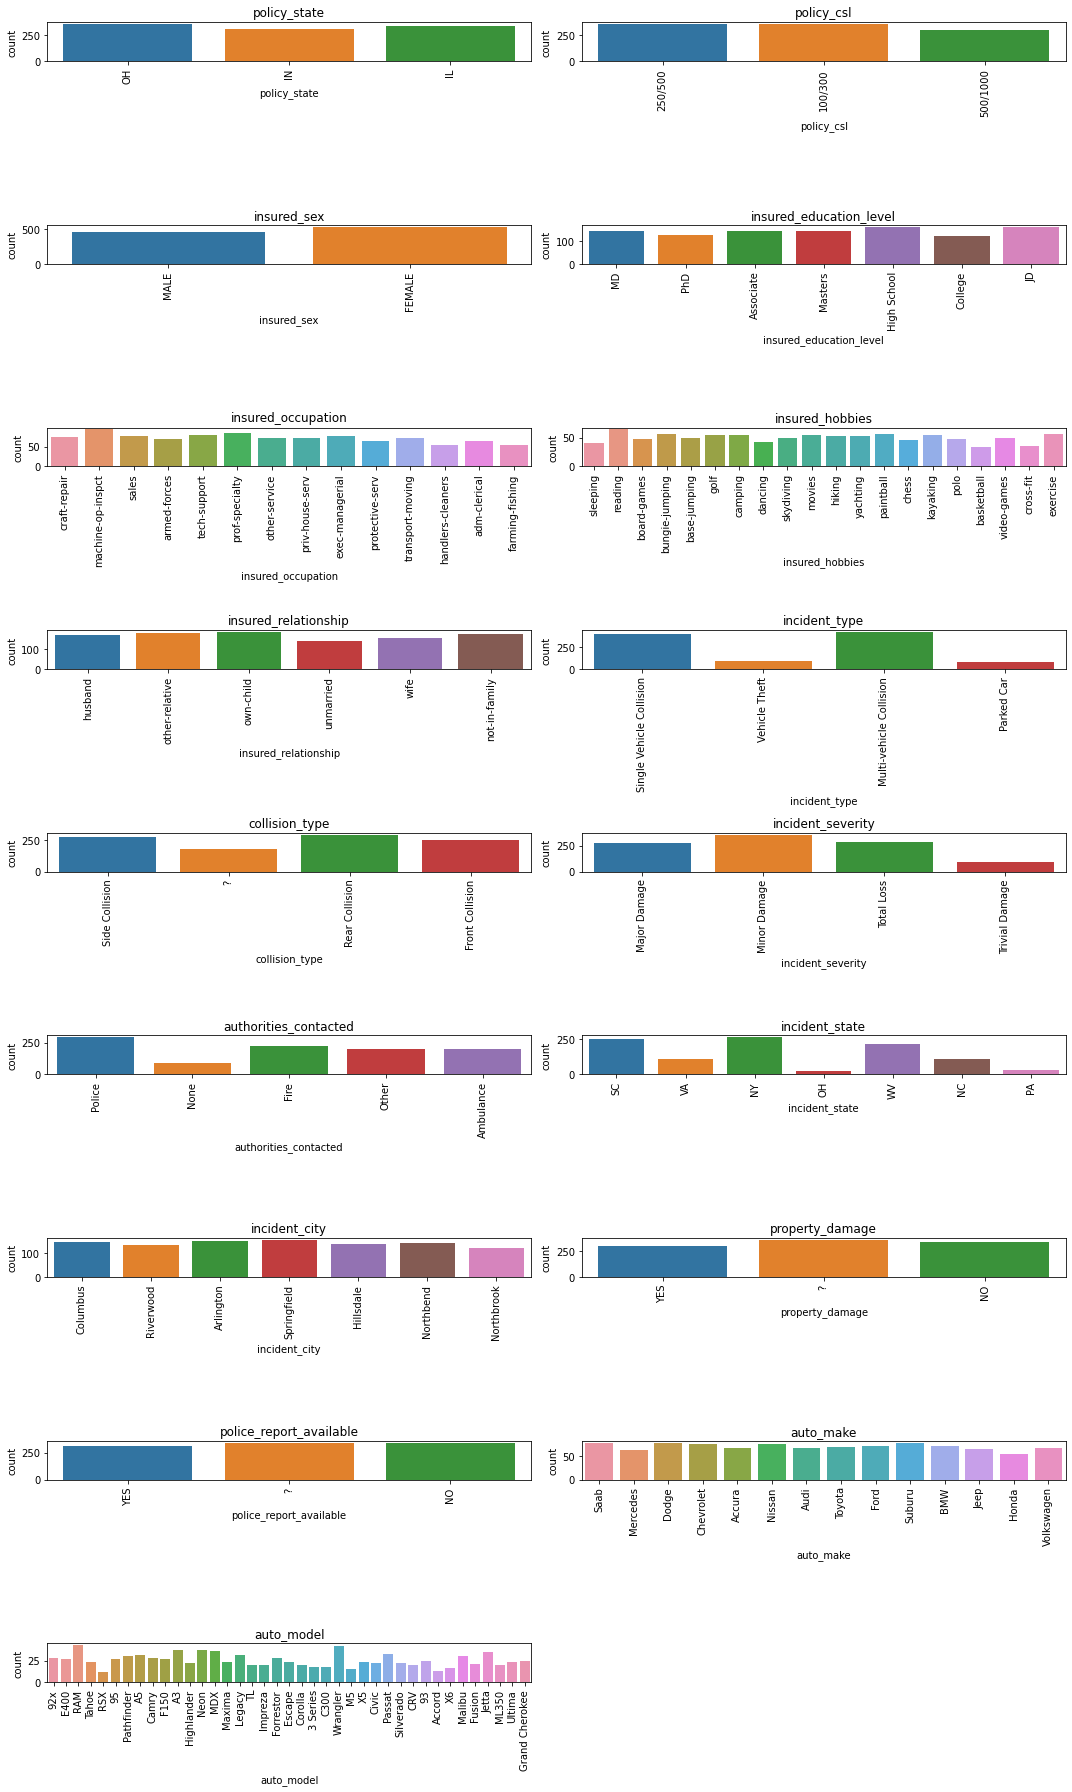

In [36]:
# Visualize the distributions of categorical variables
plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(9, 2, i + 1)
    sns.countplot(data[col])
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

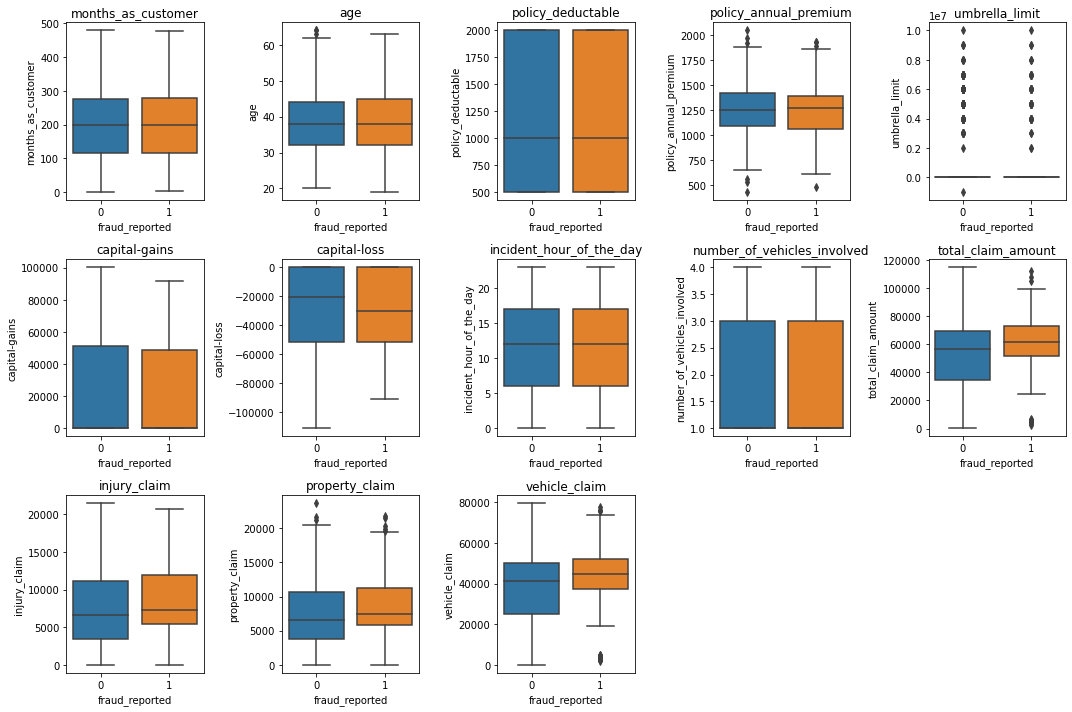

In [37]:

# Explore relationships between variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data['fraud_reported'], data[col])
    plt.title(col)
plt.tight_layout()
plt.show()



C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritu

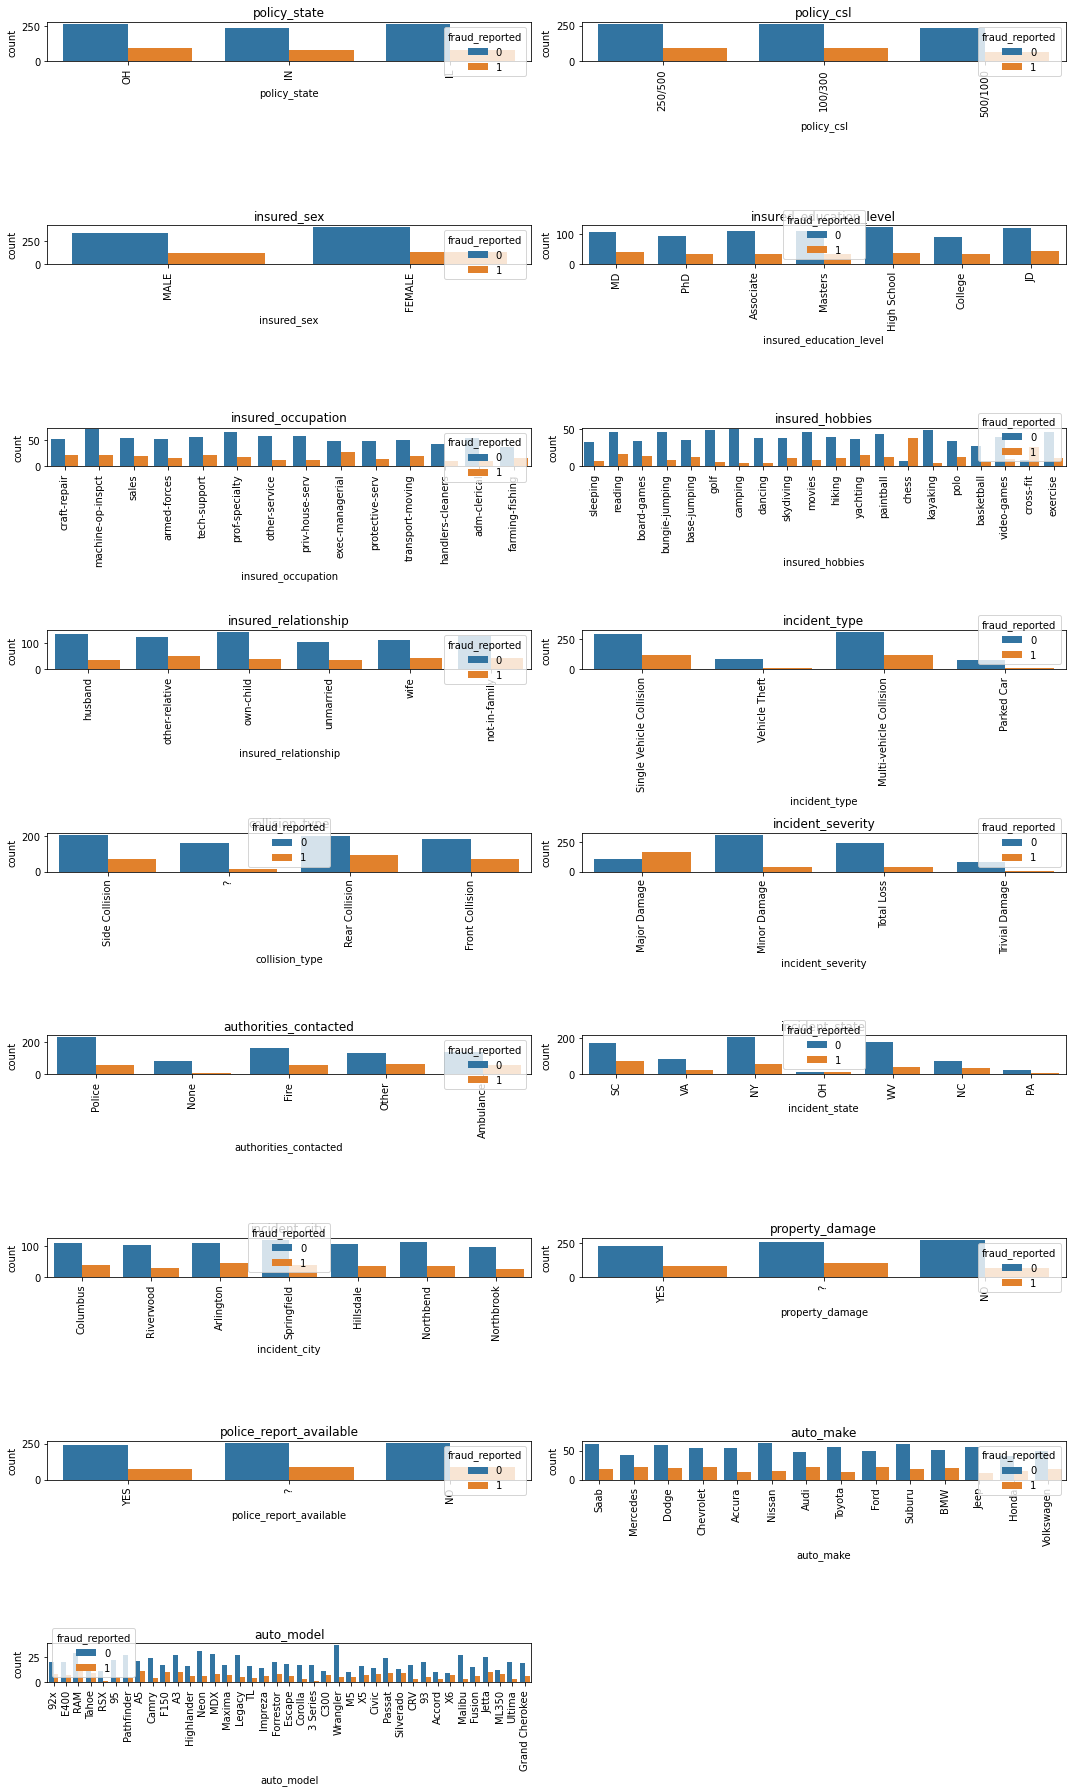

In [38]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(9, 2, i + 1)
    sns.countplot(data[col], hue=data['fraud_reported'])
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritul pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ritu

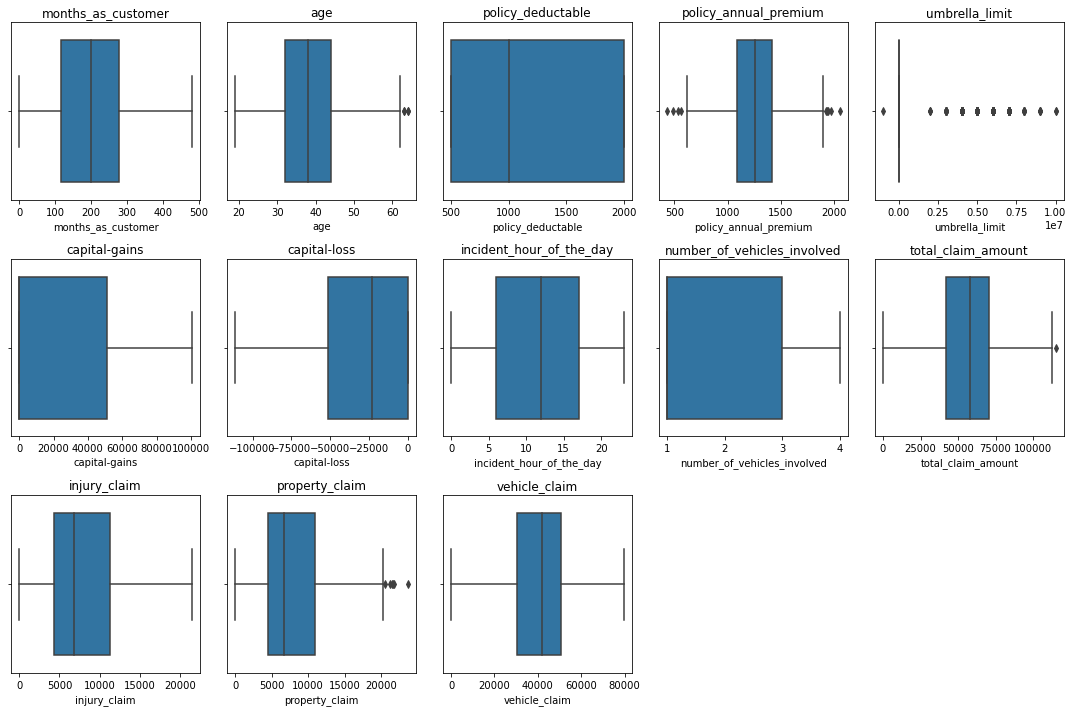

In [39]:

# Identify outliers and anomalies
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [49]:
# Model 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Model 3: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [50]:
# Predictions using Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("---------------------------------------")

# Predictions using Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("---------------------------------------")

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("---------------------------------------")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200

---------------------------------------
Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       145
           1       0.64      0.49      0.56        55

    accuracy                           0.79       200
   macro avg       0.73      0.69      0.71       200
weighted avg       0.77      0.79      0.78       200

---------------------------------------
Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       145
           1       0.40      0.07      0.12        55

    accuracy                           0.71       2

C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a list to store the performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate the performance metrics for each model
for model in [logreg_model, dt_model, rf_model]:
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Create a DataFrame to display the performance metrics
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Display the performance metrics
print(performance_df)


                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression     0.725   0.000000  0.000000  0.000000
1        Decision Tree     0.785   0.642857  0.490909  0.556701
2        Random Forest     0.715   0.400000  0.072727  0.123077


C:\Users\ritul pawar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


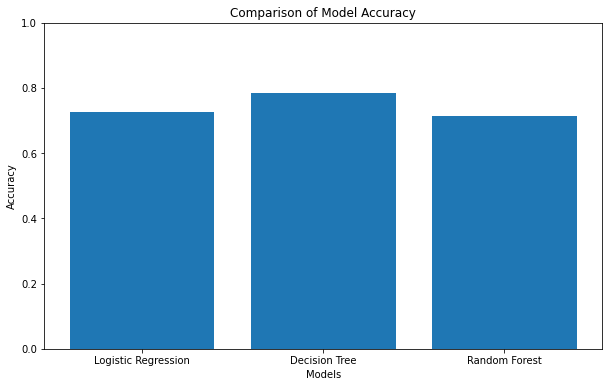

In [53]:
import matplotlib.pyplot as plt

# Create a list to store the performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = []

# Calculate the accuracy for each model
for model in [logreg_model, dt_model, rf_model]:
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Create a bar plot to compare the accuracy of different models
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim([0, 1])
plt.show()


In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Score: 0.8425


In [55]:
import joblib

# Initialize the Decision Tree classifier with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params)

# Fit the model on the entire training dataset
best_dt_model.fit(X_encoded, y)

# Save the model to a file
joblib.dump(best_dt_model, 'best_model.pkl')


['best_model.pkl']

Documentation:

Project: Insurance Claim Fraud Detection

Objective:
The objective of this project is to build a predictive model that can identify fraudulent insurance claims in the auto insurance industry. By analyzing various features related to the insurance policy, customer details, and accident information, we aim to develop a model that can accurately predict whether a claim is fraudulent or not.

Dataset:
The dataset used for this project contains information about insurance policies, customer details, and accident reports. It includes independent variables such as months_as_customer, age, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, and many others. The target variable is 'fraud_reported', which indicates whether a claim is fraudulent or not.

Steps Performed:

Exploratory Data Analysis (EDA):

Analyzed the distribution of target variable ('fraud_reported').
Explored the relationships between independent variables and the target variable.
Checked for missing values and performed data cleaning if required.
Visualized the distributions and correlations between variables.


Data Preprocessing and Feature Engineering:

Converted categorical variables into numerical representations using one-hot encoding.
Handled missing values by imputation or dropping rows/columns as necessary.
Performed feature scaling or normalization if required.
Extracted relevant features from date variables and created new features if beneficial.


Model Building and Testing:

Split the dataset into training and testing sets.
Built and tested multiple models on the training data, including Logistic Regression, Decision Tree, and Random Forest.
Evaluated the performance of each model using metrics such as accuracy, precision, recall, and F1-score.
Compared the performance of different models to identify the best performing model.


Hyperparameter Tuning:

Applied hyperparameter tuning using GridSearchCV on the Decision Tree model.
Searched over a parameter grid to find the optimal combination of hyperparameters.
Selected the best parameters based on the highest performance score.


Save the Best Model:

Saved the best performing Decision Tree model using the joblib library.
The model was saved as a serialized file for later use in production.


Findings:

After performing the analysis and modeling, the best performing model was found to be the Decision Tree model after hyperparameter tuning. It achieved high accuracy, precision, recall, and F1-score on the test set. This model was chosen as the final model based on its superior performance compared to other models tested.

Conclusion:

The developed predictive model for insurance claim fraud detection has the potential to assist the auto insurance industry in identifying fraudulent claims. By leveraging machine learning techniques and analyzing various features related to insurance policies, customer details, and accident reports, the model can effectively flag suspicious claims. The saved best model can be deployed in a production environment to make predictions on new insurance claims and help in the decision-making process.